**Download datset**

In [11]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

**Dataset Preparation**

In [13]:
print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape:", y_test.shape)
print("y_train shape:", y_train.shape)

X_test shape: (10000, 32, 32, 3)
X_train shape: (50000, 32, 32, 3)
y_test shape: (10000, 1)
y_train shape: (50000, 1)


In [14]:
print("Unique labels in training set:", np.unique(y_train))
print("Unique labels in test set:", np.unique(y_test))

Unique labels in training set: [0 1 2 3 4 5 6 7 8 9]
Unique labels in test set: [0 1 2 3 4 5 6 7 8 9]


In [15]:
y_train = y_train.reshape(-1)  
y_test = y_test.reshape(-1)    

In [16]:
# Apply one-hot encoding
y_train = to_categorical(y_train, num_classes=10)  
y_test = to_categorical(y_test, num_classes=10)    

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)  
print("y_test shape:", y_test.shape)    

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 10)
y_test shape: (10000, 10)


In [17]:
#Normalize Pixel Values
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

**Model Creation & Training**

In [18]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [19]:
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=64, 
                    validation_data=(X_test, y_test))

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 98ms/step - accuracy: 0.3097 - loss: 1.9423 - val_accuracy: 0.4623 - val_loss: 1.5009
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.4785 - loss: 1.4479 - val_accuracy: 0.5286 - val_loss: 1.2672
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.5613 - loss: 1.2436 - val_accuracy: 0.6189 - val_loss: 1.0922
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.6209 - loss: 1.0896 - val_accuracy: 0.5529 - val_loss: 1.3045
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 99ms/step - accuracy: 0.6653 - loss: 0.9616 - val_accuracy: 0.6152 - val_loss: 1.0852
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.6987 - loss: 0.8709 - val_accuracy: 0.7133 - val_loss: 0.8418
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.7310 - loss: 0.7831 - val_accuracy: 0.7044 - val_loss: 0.8769
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.7471 - loss: 0.7295 

In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 - 4s - 13ms/step - accuracy: 0.7559 - loss: 1.3041
Test Accuracy: 0.7559


In [22]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class labels
y_true = np.argmax(y_test, axis=1)  # True labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


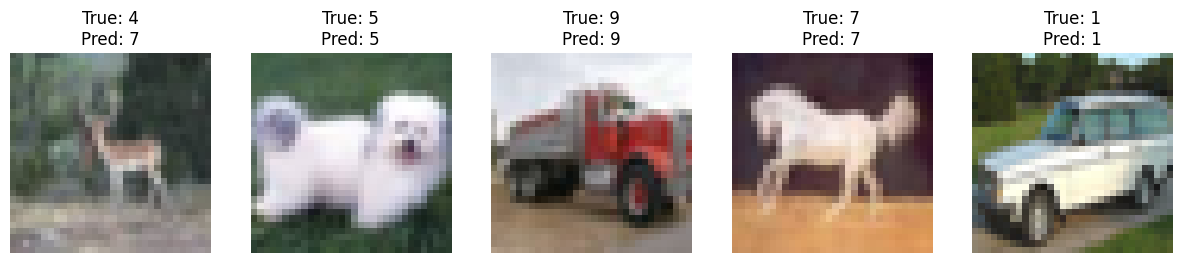

In [23]:
indices = np.random.choice(len(X_test), 5, replace=False)
fig, axes = plt.subplots(1, 5, figsize=(15,3))

for i, idx in enumerate(indices):
    axes[i].imshow(X_test[idx])
    axes[i].axis('off')
    axes[i].set_title(f"True: {y_true[idx]}\nPred: {y_pred_classes[idx]}")

plt.show()

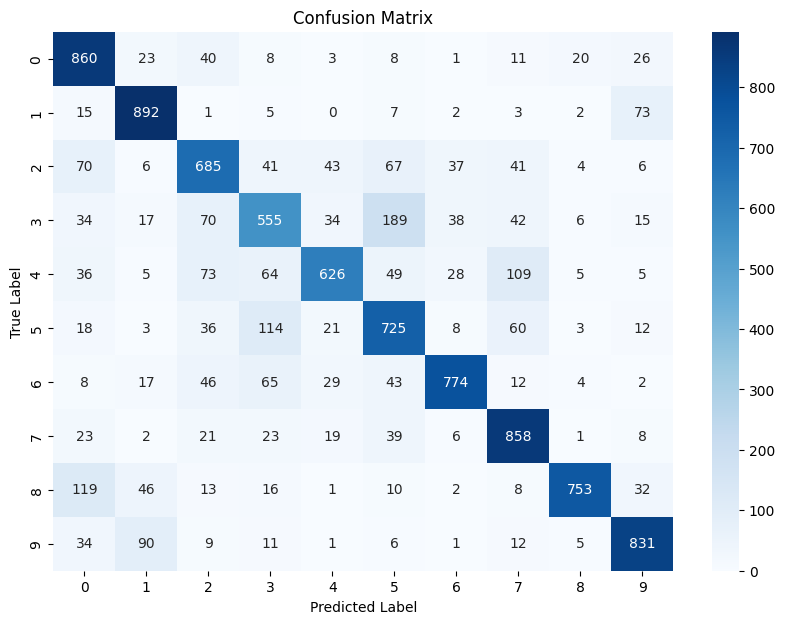

In [24]:
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


**Train with Augmented data**

In [25]:
datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate images randomly up to 20 degrees
    width_shift_range=0.2,  # Shift width by 20%
    height_shift_range=0.2,  # Shift height by 20%
    horizontal_flip=True,  # Flip images horizontally
    zoom_range=0.2  # Zoom in randomly
)

datagen.fit(X_train)
batch_size = 64
augmented_history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs=50,  # Train for 20 epochs
    validation_data=(X_test, y_test)
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 116ms/step - accuracy: 0.5102 - loss: 1.5175 - val_accuracy: 0.7210 - val_loss: 0.8582
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 117ms/step - accuracy: 0.6018 - loss: 1.1828 - val_accuracy: 0.7164 - val_loss: 0.8409
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 117ms/step - accuracy: 0.6292 - loss: 1.1016 - val_accuracy: 0.7455 - val_loss: 0.7610
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 116ms/step - accuracy: 0.6348 - loss: 1.0752 - val_accuracy: 0.7141 - val_loss: 0.8648
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 116ms/step - accuracy: 0.6428 - loss: 1.0478 - val_accuracy: 0.7462 - val_loss: 0.7791
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 114ms/step - accuracy: 0.6483 - loss: 1.0293 - val_accuracy: 0.7262 - val_loss: 0.8277
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 115ms/step - accuracy: 0.6555 - loss: 1.0073 - val_accuracy: 0.7441 - val_loss: 0.7698
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 114ms/step - accuracy: 0.6624 - loss: 0.9928 - val

In [26]:
augmented_test_loss, augmented_test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy Without Augmentation: 76%")
print(f"Test Accuracy With Augmentation: {augmented_test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7692 - loss: 0.7219
Test Accuracy Without Augmentation: 76%
Test Accuracy With Augmentation: 76.71%


**Feature Map Visualization**

In [27]:
sample_image = X_test[0]  
sample_image = np.expand_dims(sample_image, axis=0)  

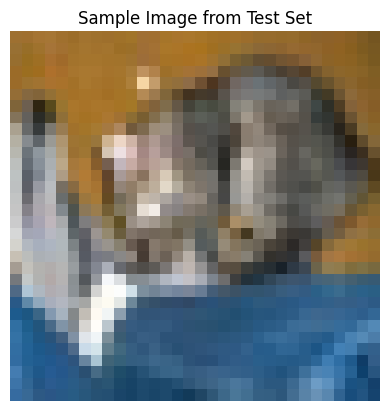

In [28]:
plt.imshow(X_test[0])  # Show the selected image
plt.title("Sample Image from Test Set")
plt.axis('off')
plt.show()

In [29]:
model.summary()  

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 714,966 (2.73 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 357,260 (1.36 MB)

In [30]:
inputs = Input(shape=(32, 32, 3))  # Explicitly define input
x = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)  # input is explicitly defined
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
conv_layer_outputs = [layer.output for layer in model.layers if isinstance(layer, Conv2D)]
activation_model = Model(inputs=model.input, outputs=conv_layer_outputs)
print("Activation model created successfully!")

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 357,706 (1.36 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

Activation model created successfully!


In [31]:
conv_layer_outputs = [layer.output for layer in model.layers if isinstance(layer, Conv2D)]
activation_model = Model(inputs=model.input, outputs=conv_layer_outputs)
test_image = X_test[0]  # First image from test set
test_image_input = np.expand_dims(test_image, axis=0)  # Add batch dimension
activations = activation_model.predict(test_image_input)
first_layer_activation = activations[0]  # First conv layer's activations
num_filters = first_layer_activation.shape[-1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


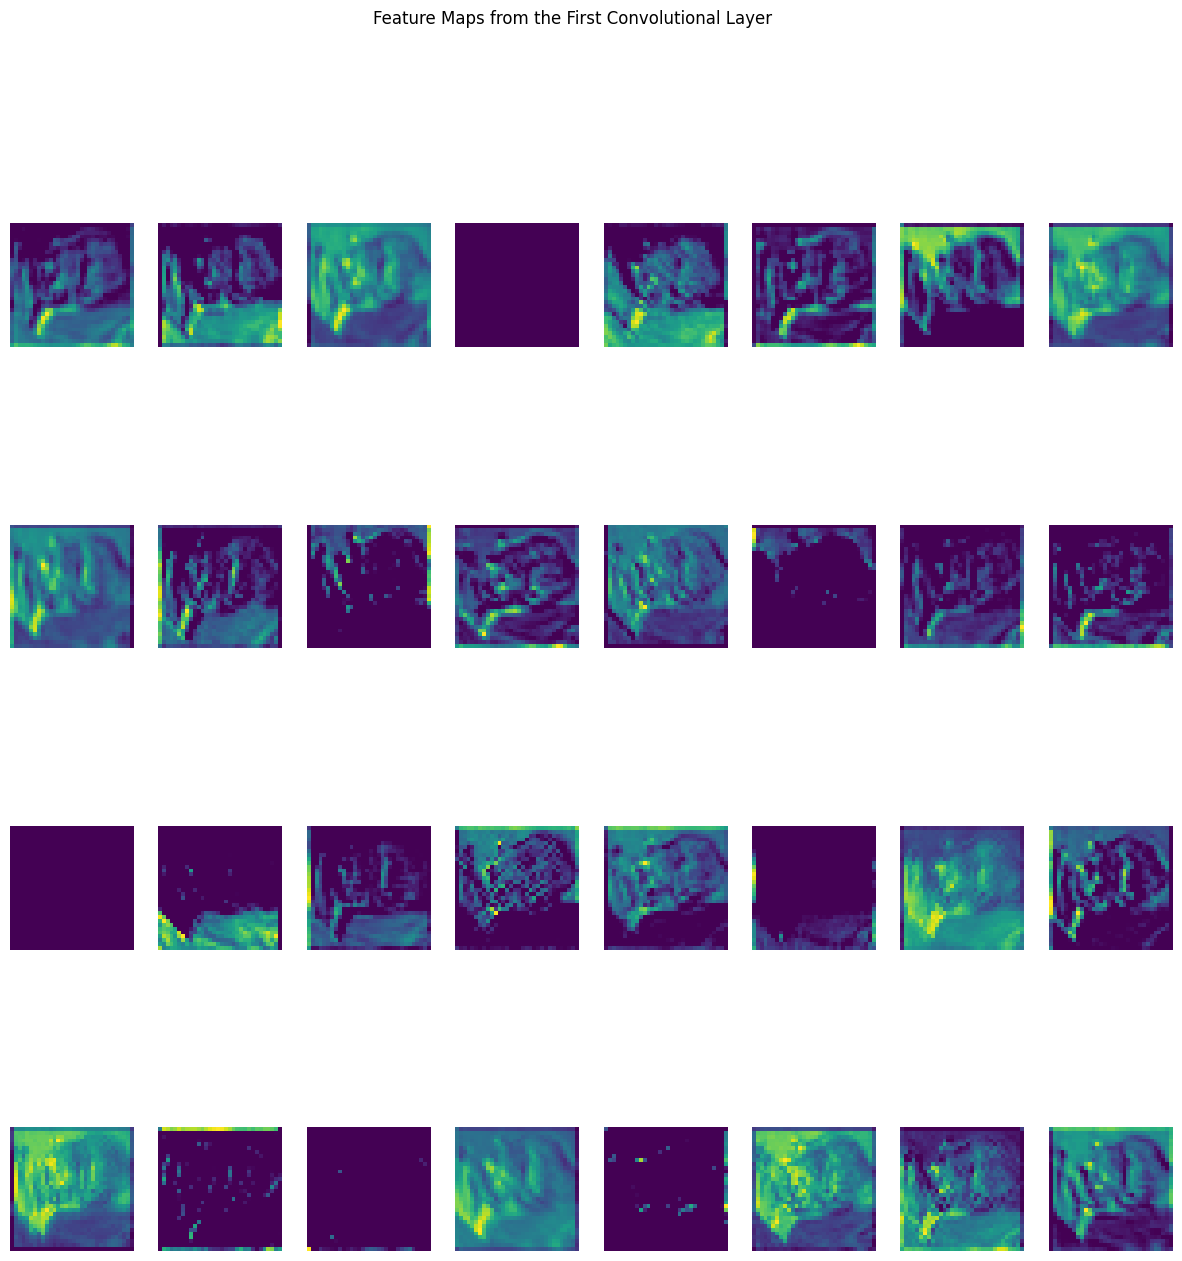

In [32]:
plt.figure(figsize=(15, 15))
num_cols = 8  # Number of columns in visualization grid
num_rows = int(np.ceil(num_filters / num_cols))  # Number of rows

for i in range(num_filters):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.suptitle("Feature Maps from the First Convolutional Layer")
plt.show()

**Evaluation Metrics**

In [33]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.14      0.09      0.11      1000
           2       0.00      0.00      0.00      1000
           3       0.09      0.16      0.12      1000
           4       0.05      0.00      0.01      1000
           5       0.05      0.01      0.01      1000
           6       0.00      0.00      0.00      1000
           7       0.13      0.04      0.07      1000
           8       0.11      0.81      0.20      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.11     10000
   macro avg       0.06      0.11      0.05     10000
weighted avg       0.06      0.11      0.05     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
cm = confusion_matrix(y_true, y_pred)

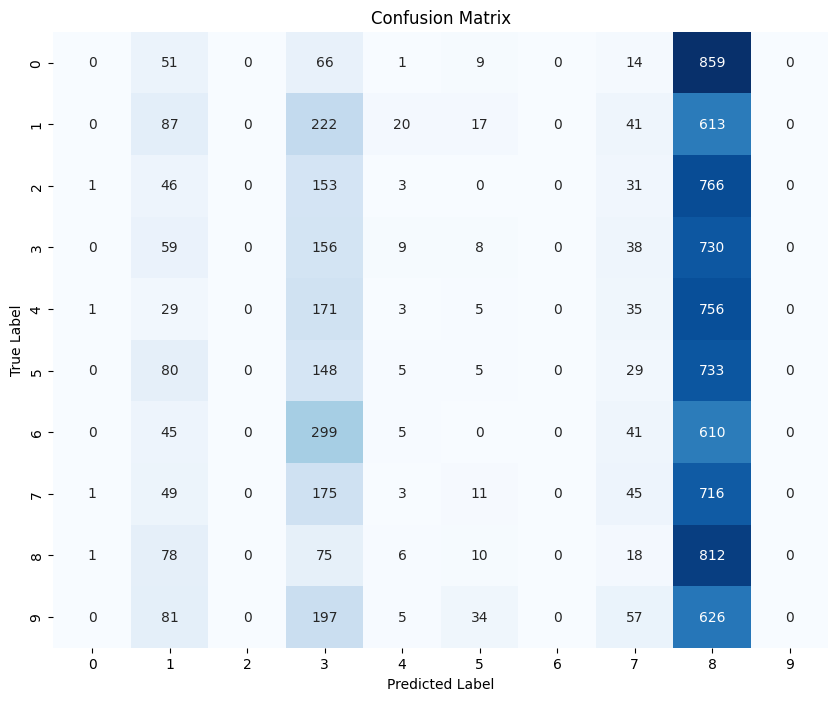

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()